In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl



In [ ]:
credit_data = pd.read_csv('/content/train_ctrUa4K.csv')
credit_data1 = pd.read_csv('/content/test_lAUu6dG.csv')
credit_sub  = pd.read_csv('/content/sample_submission_49d68Cx.csv')
credit_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b8407d4a8>,
      dtype=object)

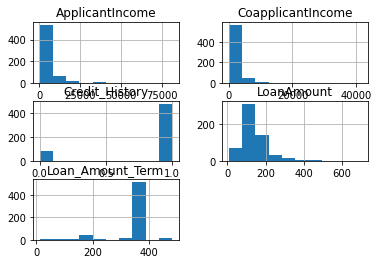

In [ ]:
credit_data.hist()

In [ ]:
# Count the number of missing values in each column
credit_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Define a function impute_median
def impute_mean(series):
    return series.fillna(series.mean())

In [ ]:
#filling missing data with median for columns containg numeric value in train data set
credit_data.Loan_Amount_Term = credit_data['Loan_Amount_Term'].transform(impute_mean)
credit_data.LoanAmount = credit_data['LoanAmount'].transform(impute_mean)
credit_data.Credit_History = credit_data['Credit_History'].transform(impute_mean)
#filling missing data with median for columns containg numeric value in test data set
credit_data1.Loan_Amount_Term = credit_data1['Loan_Amount_Term'].transform(impute_mean)
credit_data1.LoanAmount = credit_data1['LoanAmount'].transform(impute_mean)
credit_data1.Credit_History = credit_data1['Credit_History'].transform(impute_mean)

In [ ]:
credit_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling missing data with mode for columns containg numeric value in train data set
credit_data['Gender'].fillna(str(credit_data['Gender'].mode().values[0]), inplace=True)
credit_data['Married'].fillna(str(credit_data['Married'].mode().values[0]), inplace=True)
credit_data['Dependents'].fillna(str(credit_data['Dependents'].mode().values[0]), inplace=True)
credit_data['Self_Employed'].fillna(str(credit_data['Self_Employed'].mode().values[0]), inplace=True)
#filling missing data with mode for columns containg numeric value in test data set
credit_data1['Gender'].fillna(str(credit_data1['Gender'].mode().values[0]), inplace=True)
credit_data1['Married'].fillna(str(credit_data1['Married'].mode().values[0]), inplace=True)
credit_data1['Dependents'].fillna(str(credit_data1['Dependents'].mode().values[0]), inplace=True)
credit_data1['Self_Employed'].fillna(str(credit_data1['Self_Employed'].mode().values[0]), inplace=True)

In [ ]:
#Removing + sign in train data
credit_data['Dependents'] = credit_data['Dependents'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
credit_data['Dependents'] = credit_data['Dependents'].apply(lambda x: float(x))
#Removing + sign in test data
credit_data1['Dependents'] = credit_data1['Dependents'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
credit_data1['Dependents'] = credit_data1['Dependents'].apply(lambda x: float(x))

In [ ]:
print(credit_data['Dependents'])

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    3.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64


In [ ]:
credit_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [ ]:
le_count =0
for col in credit_data.columns[1:]:
  if credit_data[col].dtype == "object":
        if len(list(credit_data[col].unique()))<=3:
            le.fit(credit_data[col])
            credit_data[col] = le.transform(credit_data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
le_count1 =0
for colm in credit_data1.columns[1:]:
  if credit_data1[colm].dtype == "object":
        if len(list(credit_data1[colm].unique()))<=3:
            le.fit(credit_data1[colm])
            credit_data1[colm] = le.transform(credit_data1[colm])
            le_count1 += 1
print('{} columns were label encoded.'.format(le_count1))

6 columns were label encoded.
5 columns were label encoded.


In [ ]:
credit_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,5))
data_col = list(credit_data.columns)
data_col.remove('Loan_ID')
data_col.remove('Loan_Status')
#daat_col1 contain features(columns) of credit_data data frame. in trianig purpose Loan Id is irrelivent parameter so i removimg removing loan-ID column from 
data_col1 = list(credit_data1.columns)
data_col1.remove('Loan_ID')

In [ ]:
#Applying scalling Using max min function for train data set. By converting string data into numeric and then using scale trasfromation on it. 
for col in data_col:
    credit_data[col] = credit_data[col].astype(float)
    credit_data[col] =scaler.fit_transform(credit_data[[col]])
credit_data['Loan_Status'] = pd.to_numeric(credit_data['Loan_Status'],downcast='float')
#Applying scalling Using max min function for test data set
for colm in data_col1:
    credit_data1[colm] = credit_data1[colm].astype(float)
    credit_data1[colm] =scaler.fit_transform(credit_data1[[colm]])


In [ ]:
temp = credit_data
temp1 = credit_data1
temp = temp.drop(columns=['Loan_Status'])
temp = temp.drop(columns=['Loan_ID'])
temp1 = temp1.drop(columns=['Loan_ID'])
temp2 = credit_sub
target = credit_data['Loan_Status']
x_train = temp
x_test =temp1
y_train = target
print (x_train.shape)
print (y_train.shape)
print(x_test.shape)

(614, 11)
(614,)
(367, 11)


In [ ]:
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree


In [ ]:
#trining logistic regression
log_reg =LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Logistic prediction from trained logistic regression model
y_pred = log_reg.predict(x_test)
print(y_pred)
#Assigning pridicted output in temp2 data frame (data taken from sample submission) 
temp2['Loan_Status'] =y_pred
temp2['Loan_Status'] = pd.to_numeric(temp2['Loan_Status'],downcast='integer')
print(temp2)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.

In [ ]:
#Converting 1 to Y and 0 to N
temp2['Loan_Status'] = temp2['Loan_Status'].apply(lambda x: 'Y' if x==1 else 'N')
#creating csv file using temp2 data frame
temp2.to_csv('outputLR.csv',index=False)

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_tree = model.predict(x_test)

In [ ]:
temp3 = credit_sub
temp3['Loan_Status'] =y_tree
temp3['Loan_Status'] = pd.to_numeric(temp3['Loan_Status'],downcast='integer')

In [ ]:
#Converting 1 to Y and 0 to N
temp3['Loan_Status'] = temp3['Loan_Status'].apply(lambda x: 'Y' if x==1 else 'N')
#creating csv file using temp3 data frame
temp3.to_csv('outputtree.csv',index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='tanh', solver='adam', max_iter=1000)
mlp.fit(x_train,y_train)

y_nl = mlp.predict(x_test)
print(y_nl)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.

In [ ]:
temp4 = credit_sub
temp4['Loan_Status'] =y_nl
temp4['Loan_Status'] = pd.to_numeric(temp3['Loan_Status'],downcast='integer')

In [ ]:
#Converting 1 to Y and 0 to N
temp4['Loan_Status'] = temp4['Loan_Status'].apply(lambda x: 'Y' if x==1 else 'N')
#creating csv file using temp3 data frame
temp4.to_csv('outputnl_2.csv',index=False)